In [1]:
from array import array
import math
import numpy as np

In [2]:
def generator_function(x,par,ichoice):
    if (ichoice == 5):
        return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x
    elif (ichoice ==6):
        return par[0]+par[1]*x+par[2]*x*x
    else:
        return par[0]+par[1]*x

In [3]:
def fitfunction(x,*paramlist):
    if (ichoice == 5):
        return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x
    elif (ichoice ==6):
        return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x
    else:
        return paramlist[0]+paramlist[1]*x

In [4]:
ichoice = 2

In [5]:
if ichoice == 1:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = 0.0
    xhigh = 8.0
elif ichoice == 2:
    m = 1
    n = 10
    par = []
    par.append(6.81)
    par.append(0.656)
    par = np.array(par)
    jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
    jitter = np.array(jitter)
    sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = 41.0
    xhigh = 50.0
elif ichoice == 3:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 4:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 5:
    m = 3
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par.append(0.00)
    par.append(0.20)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    sigma = np.array(sigma)
    Title = "Cubic Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 6:
    m = 2
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par.append(5.10)
    par=np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    sigma = np.array(sigma)
    Title = "Quadratic Fit"
    xlow = -4.0
    xhigh = 4.0
else:
    print("Invalid choice!!!!")

In [6]:
x = [0.0 for i in range(n)]
y = [0.0 for i in range(n)]
ex = [0.0 for i in range(n)]
ey = [0.0 for i in range(n)]
x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

rootfitstring = "pol"+str(m)

In [7]:
for i in range(0,n):
    x[i]=float(xlow+(xhigh-xlow)*i/(n-1))
    y[i]=float(generator_function(x[i],par,ichoice)+jitter[i])
    ex[i]=float(0.0)
    ey[i]=float(sigma[i])
    
print(x,y,ex,ey)

[41. 42. 43. 44. 45. 46. 47. 48. 49. 50.] [34.006 34.562 34.518 35.474 36.53  37.586 37.242 36.798 39.654 40.11 ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51]


In [8]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [9]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
for k in range(0,m+1):
    print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

A matrix = 
[[3.84467512e+01 1.74932718e+03]
 [1.74932718e+03 7.99115725e+04]]
V matrix = 
[[ 1408.99653979]
 [64317.60861207]]
A_inverse = 
[[ 6.55294364e+00 -1.43449091e-01]
 [-1.43449091e-01  3.15272727e-03]]
Diagonal Check:
[[ 1.00000000e+00 -5.74188209e-16]
 [-5.26297255e-13  1.00000000e+00]]
Coefficients:
k = 0, coeff = 6.772424 +/- 2.559872
k = 1, coeff = 0.656606 +/- 0.056149


In [10]:
yfit = 0
chi2 = 0

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m_params):
    for j in range(0,m_params):
        rho[k][j]=rho[k][j]+ainv[k][j]/math.sqrt(ainv[k][k]*ainv[j][j])    
print (rho)

i = 0  y = 34.006000  yfit = 33.693273
i = 1  y = 34.562000  yfit = 34.349879
i = 2  y = 34.518000  yfit = 35.006485
i = 3  y = 35.474000  yfit = 35.663091
i = 4  y = 36.530000  yfit = 36.319697
i = 5  y = 37.586000  yfit = 36.976303
i = 6  y = 37.242000  yfit = 37.632909
i = 7  y = 36.798000  yfit = 38.289515
i = 8  y = 39.654000  yfit = 38.946121
i = 9  y = 40.110000  yfit = 39.602727
chi2/dof = 15.259399 / 8.000000
[[ 1.         -0.99801342]
 [-0.99801342  1.        ]]


In [11]:
xfiterr = array('d')
yfiterr = array('d')
yfitplus2 = array('d')
yfitminus2 = array('d')

for i in range(0,n):
    xfiterr.append(xlow+(xhigh-xlow)*i/(n-1))
    yerror2 = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            #print (k,j,term)
            yerror2 = yerror2 + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfiterr.append(yval)
    yfitplus2.append(yval+math.sqrt(yerror2))
    yfitminus2.append(yval-math.sqrt(yerror2))
    print(i,xfiterr[i],yval,math.sqrt(yerror2),yfitplus2[i],yfitminus2[i])

0 41.0 [[33.69327273]] 0.29975444495908143 33.99302717223065 33.39351828231248
1 42.0 [[34.34987879]] 0.2542260983670019 34.60410488624463 34.09565268951063
2 43.0 [[35.00648485]] 0.21380960094098883 35.220294449424685 34.792675247542704
3 44.0 [[35.66309091]] 0.18194404734323164 35.84503495643299 35.48114686174653
4 45.0 [[36.31969697]] 0.16370150218669463 36.48339847188252 36.15599546750913
5 46.0 [[36.97630303]] 0.16370150218670007 37.14000453248859 36.812601528115195
6 47.0 [[37.63290909]] 0.18194404734322675 37.81485313825119 37.45096504356473
7 48.0 [[38.28951515]] 0.2138096009409909 38.503324752455015 38.07570555057303
8 49.0 [[38.94612121]] 0.2542260983669984 39.20034731048709 38.69189511375309
9 50.0 [[39.60272727]] 0.29975444495908143 39.90248171768524 39.30297282776707


Welcome to JupyROOT 6.18/00
Fit 1: 15.259399 8.000000 



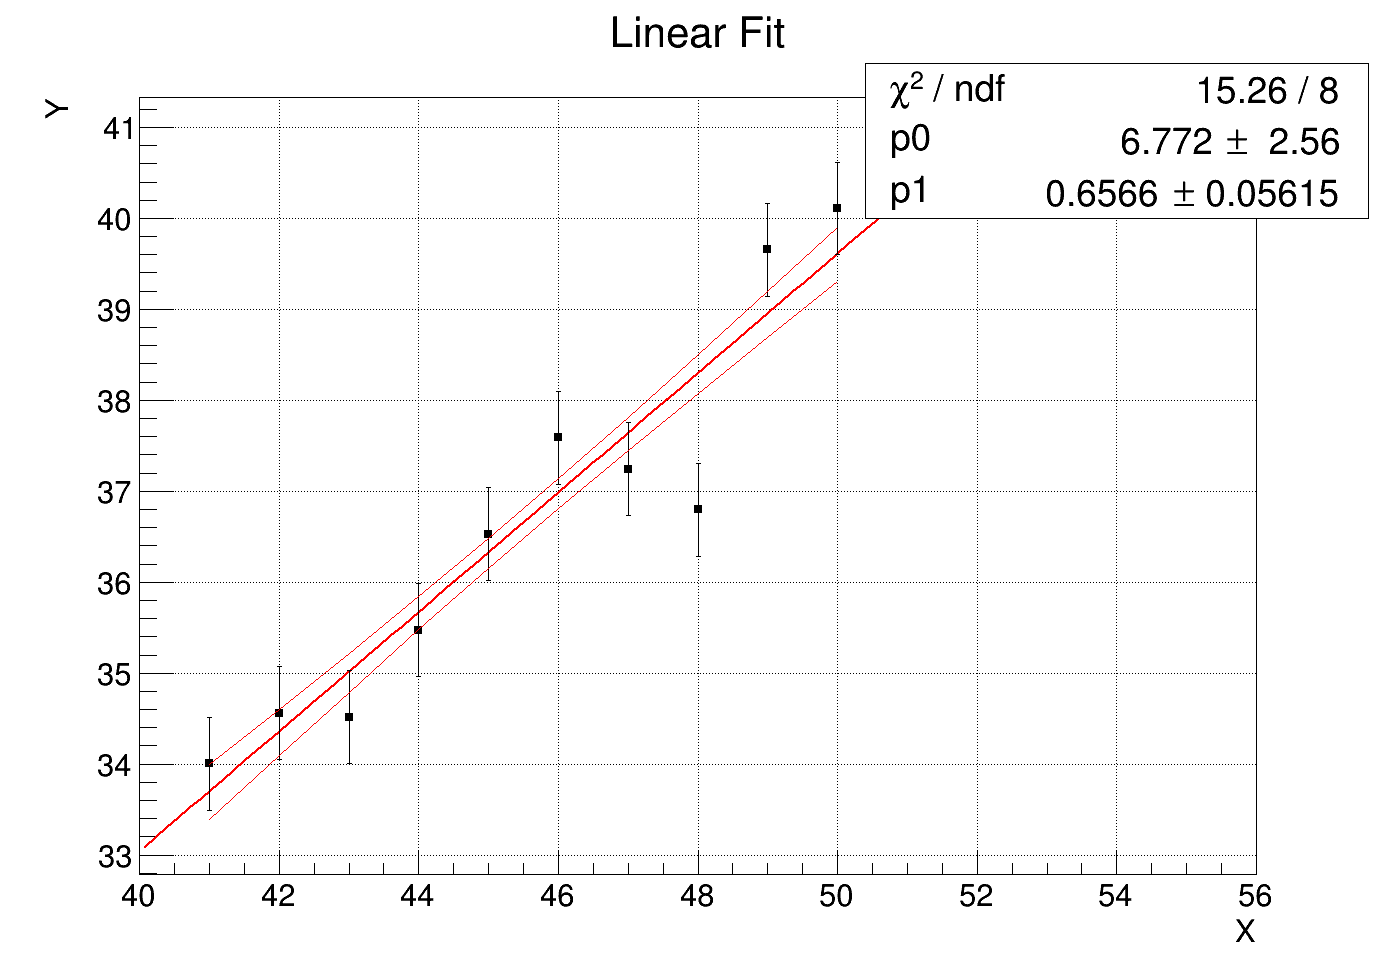

In [12]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Error Band Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(n,xfiterr,yfitplus2)
grm = TGraph(n,xfiterr,yfitminus2)

pfit1 = TF1("pfit1",rootfitstring)

gr.SetMarkerStyle(21)
gr.SetTitle(Title)
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.GetXaxis().SetLimits(xlow-1.0,xhigh+6.0) 
#gr.GetHistogram().SetMaximum(5.0)
#gr.GetHistogram().SetMinimum(0.0)
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.SetLineColor(2)
grm.SetLineColor(2)
grp.Draw("L")
grm.Draw("L")
c1.Draw()

In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title(Title)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(xlow-1,xhigh+6)
ax1.set_yscale("linear",nonposy='clip')
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals,sigma=sigma,absolute_sigma=True)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

npoints = n

yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma[i]*sigma[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(npoints-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r-', label = mylabel % tuple(param))
ax1.plot(xi,lower,'r--')
ax1.plot(xi,upper,'r--')

leg = ax1.legend()
plt.show()

Coefficients (from curve_fit)
[6.77242408 0.65660606]
Covariance Matrix (from curve_fit)
[[ 6.55294279e+00 -1.43449068e-01]
 [-1.43449068e-01  3.15272667e-03]]
Chi^2 / dof = 1.526E+01 / 8
Fit Parameter 0: 6.772E+00 +/- 2.560E+00
0 1 -9.980E-01
Fit Parameter 1: 6.566E-01 +/- 5.615E-02


<Figure size 1500x1200 with 1 Axes>

In [14]:
yerr_trad = array('d')
yerr_proper = array('d')
ymax = 0.0
for index in range(n):
    yfitvalue = 0.0
    yerrorvalue = 0.0
    for k in range(0,m_params):
        yfitvalue = yfitvalue + coeff[k]*math.pow(x[index],k)
        yerrorvalue = yerrorvalue + math.pow(math.pow(x[index],k)*math.pow(ainv[k][k],0.5),2)
    yerrorvalue = math.sqrt(yerrorvalue)
    if yerrorvalue>ymax:
        ymax = yerrorvalue
    print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
    print ("Proper Error Calculation = %f +/- %f " % ((yfitplus2[index]+yfitminus2[index])/2.0,(yfitplus2[index]-yfitminus2[index])/2.0))
    yerr_trad.append(yerrorvalue)
    yerr_proper.append((yfitplus2[index]-yfitminus2[index])/2.0)

print(x,yerr_trad,yerr_proper)

P201 Error Calculation = 33.693273 +/- 3.442772 
Proper Error Calculation = 33.693273 +/- 0.299754 
P201 Error Calculation = 34.349879 +/- 3.480568 
Proper Error Calculation = 34.349879 +/- 0.254226 
P201 Error Calculation = 35.006485 +/- 3.518854 
Proper Error Calculation = 35.006485 +/- 0.213810 
P201 Error Calculation = 35.663091 +/- 3.557615 
Proper Error Calculation = 35.663091 +/- 0.181944 
P201 Error Calculation = 36.319697 +/- 3.596834 
Proper Error Calculation = 36.319697 +/- 0.163702 
P201 Error Calculation = 36.976303 +/- 3.636498 
Proper Error Calculation = 36.976303 +/- 0.163702 
P201 Error Calculation = 37.632909 +/- 3.676591 
Proper Error Calculation = 37.632909 +/- 0.181944 
P201 Error Calculation = 38.289515 +/- 3.717099 
Proper Error Calculation = 38.289515 +/- 0.213810 
P201 Error Calculation = 38.946121 +/- 3.758010 
Proper Error Calculation = 38.946121 +/- 0.254226 
P201 Error Calculation = 39.602727 +/- 3.799311 
Proper Error Calculation = 39.602727 +/- 0.299754 


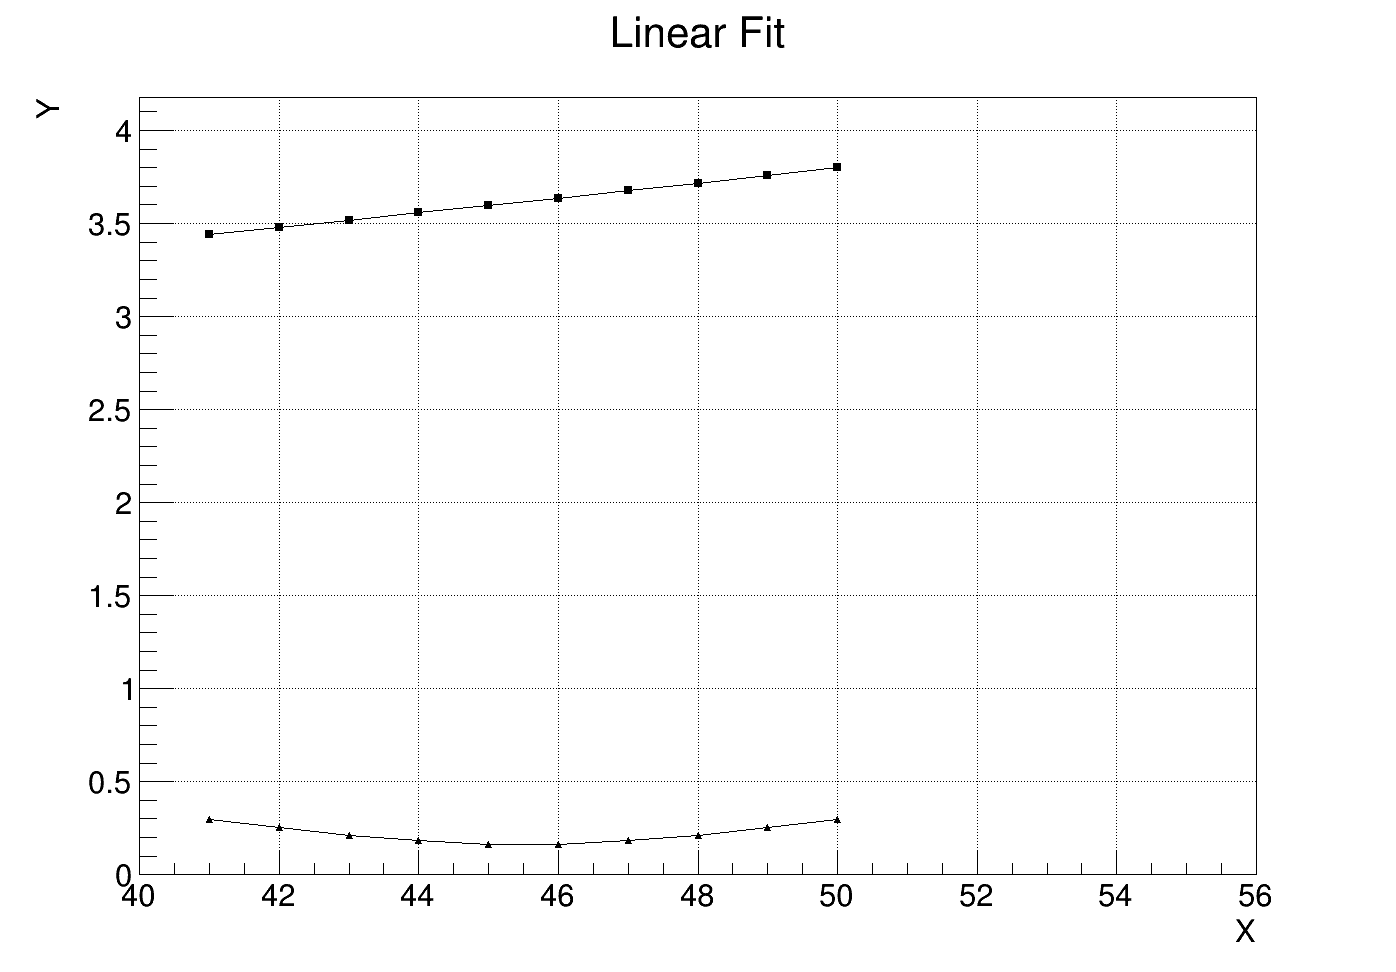

In [15]:
c2 = TCanvas( 'c2', 'Error Band Comparison', 200, 10, 1400, 1000 )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )

grtrad = TGraph(n,x,yerr_trad)
grprop = TGraph(n,x,yerr_proper)

grtrad.SetMarkerStyle(21)
grprop.SetMarkerStyle(22)
grtrad.SetTitle(Title)
grtrad.GetXaxis().SetTitle("X")
grtrad.GetYaxis().SetTitle("Y")
grtrad.GetXaxis().SetLimits(xlow-1.0,xhigh+6.0) 
grtrad.GetHistogram().SetMaximum(1.1*ymax)
grtrad.GetHistogram().SetMinimum(0.0)
grtrad.Draw("APL")
grprop.Draw("PL")

c2.Draw()